# QF 634 Applied Quantitative Research
## Homework 1 | YU LINGFENG
#### Regression and Regularization
* LinearRegression
* Ridge Regression 
* LASSO Regression
* cross validation with Linreg
* cross validation with Ridge

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

from scipy import stats
from IPython.display import display
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

## 👉 <a id = "top">Content Table</a> 👈 
## [Q0. Data set preparation](#q0)

### <font color = green> Import Data </font>
### <font color = green> StandardScaler </font>
### <font color = green> train_test_split </font>

## [Q1. LinearRegression](#q1)

### <font color = green> R2 for training set </font>
### <font color = green> R2 for test set </font>

## [Q2. Ridge Regression](#q2)

### <font color = green> alpha = 0.05 </font>
### <font color = green> R2 for training set </font>
### <font color = green> R2 for test set </font>

## [Q3. LASSO Regression](#q3)

### <font color = green> alpha = 0.01 </font>
### <font color = green> R2 for training set </font>
### <font color = green> R2 for test set </font>

## [Q4. cross validation Linreg](#q4)

### <font color = green> 4-fold (without reshuffling) </font>
### <font color = green> R2 for training set </font>
### <font color = green> R2 for test set </font>

## [Q5. cross validation Ridge](#q5)

### <font color = green> 4-fold (without reshuffling) </font>
### <font color = green> R2 for training set </font>
### <font color = green> R2 for test set </font>

## <a id = "q0">0. </a> <font color = "green"> Data set preparation </font>  [back to table of contents](#top)

### <font color = "blue"> `IMPORT` dataset: `cruise_ship_info.csv`. </font> 
### <font color = "blue"> prepare dataset

In [2]:
file_path = 'cruise_ship_info.csv'
df = pd.read_csv(file_path)
df

,Ship_name,Cruise_line,Age,TonnageGTx1000,passengersx100,lengthx100ft,cabinsx100,spaceratio,crewx100
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ship_name       158 non-null    object 
 1   Cruise_line     158 non-null    object 
 2   Age             158 non-null    int64  
 3   TonnageGTx1000  158 non-null    float64
 4   passengersx100  158 non-null    float64
 5   lengthx100ft    158 non-null    float64
 6   cabinsx100      158 non-null    float64
 7   spaceratio      158 non-null    float64
 8   crewx100        158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [4]:
list(df.columns)[-1]

'crewx100'

In [5]:
list(df.columns)[2:-1]

['Age',
 'TonnageGTx1000',
 'passengersx100',
 'lengthx100ft',
 'cabinsx100',
 'spaceratio']

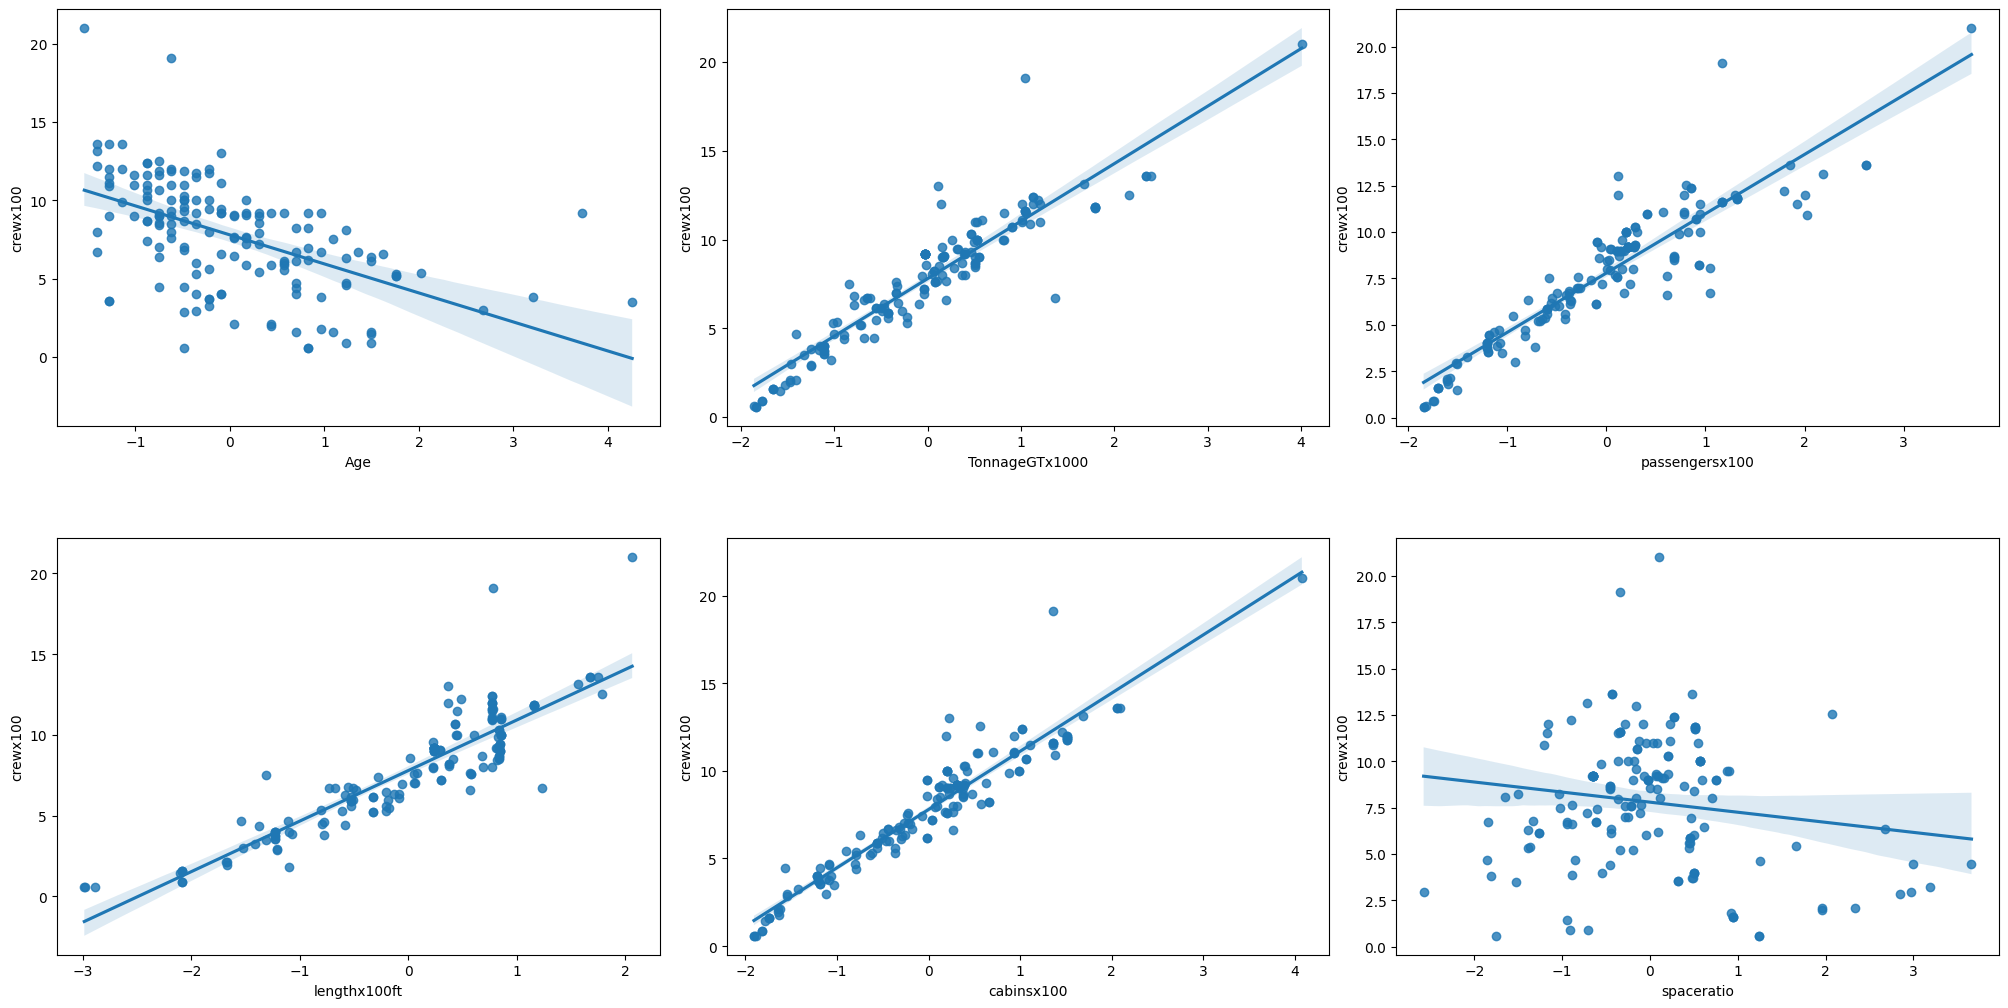

In [6]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MedHouseVal
std_scaler = preprocessing.StandardScaler()
### x is now transformed via subtracting by mean and dividing by standard deviation

column_sels = list(df.columns)[2:-1] 
### Note varnames must be in exact small or cap letters
### Features are included in order of their pairwise correlation with crewx100
X = df.loc[:,column_sels]
y = df[list(df.columns)[-1]]
X = pd.DataFrame(data=std_scaler.fit_transform(X), columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=X[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
### Note: sns.pairplot(dataset); plt.show() would produce plots of all pairs

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size = 0.3, random_state = 0) 

## <a id = "q1">1. </a> <font color = "green"> LinearRegression </font>  [back to table of contents](#top)

In [8]:
from sklearn.linear_model import LinearRegression
Linreg = LinearRegression()  
###training the algorithm, note regression is done without normalizing the X, y
Linreg.fit(X_train, y_train) 

### To retrieve the intercept:
print('Intercept (train):', Linreg.intercept_)
### To retrieving the slope:
print('Slopes (train):', Linreg.coef_)

Intercept (train): 7.80653447609923
Slopes (train): [-0.06850255  0.25812795 -1.42695736  0.82914541  3.68927452  0.02995278]


In [9]:
from sklearn.metrics import r2_score
y_pred_Linreg_train = Linreg.predict(X_train)
y_pred_Linreg_test = Linreg.predict(X_test)
### Fitting y using the x_train data
r2_score_Linreg_train = r2_score(y_train, y_pred_Linreg_train)
r2_score_Linreg_test = r2_score(y_test, y_pred_Linreg_test)
print('R2_score (train): ', r2_score_Linreg_train)
print('R2_score (test): ', r2_score_Linreg_test)
### R2_score (train) is the R-square in the linear regression
### involving only the training data set

R2_score (train):  0.9118485946473178
R2_score (test):  0.957979988701403


## <a id = "q2">2. </a> <font color = "green"> Ridge Regression </font>  [back to table of contents](#top)

In [20]:
from sklearn.linear_model import Ridge
Ridge=Ridge(alpha=.05,)
### training the algorithm, note regression is done without normalizing the X, y
Ridge.fit(X_train, y_train) 
### To retrieve the intercept:
print('Intercept (train):', Ridge.intercept_)
### To retrieving the slope:
print('Slopes (train):', Ridge.coef_)

from sklearn.metrics import r2_score
y_pred_ridge_train = Ridge.predict(X_train)
y_pred_ridge_test = Ridge.predict(X_test)
### Fitting y using the x_train data
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
### R2_score (train) is the R-square in the linear regression
### involving only the training data set

Intercept (train): 7.806583180575316
Slopes (train): [-0.06771503  0.27680153 -1.36935954  0.83123131  3.61075632  0.02745032]
R2_score (train):  0.9118361432473698
R2_score (test):  0.9581595215538382


In [21]:
y_test.shape[0]

48

In [22]:
from sklearn.metrics import mean_squared_error
### Predicting R2 Score using Test Set but Intercept(train) 
### and Slopes(train) from Ridge Training results
y_pred_Ridge = Ridge.intercept_ + np.dot(X_test,Ridge.coef_.T)
rmse_y_pred_Ridge = (np.sqrt(mean_squared_error(y_test, y_pred_Ridge)))
def tss(y_test):
    return ((y_test - np.mean(y_test))**2).sum()
R2_pred_Ridge = 1-(y_test.shape[0]*(rmse_y_pred_Ridge)**2)/tss(y_test)
print("Pred_RMSE_Ridge:",rmse_y_pred_Ridge)
print("R2_pred_Ridge:",R2_pred_Ridge)

Pred_RMSE_Ridge: 0.6490133788743174
R2_pred_Ridge: 0.9581595215538382


## <a id = "q3">3. </a> <font color = "green"> LASSO Regression </font>  [back to table of contents](#top)

In [12]:
from sklearn.linear_model import Lasso
Lasso=Lasso(alpha=0.01,)
### training the algorithm, note regression is done without normalizing the X, y
Lasso.fit(X_train, y_train)
### To retrieve the intercept:
print('Intercept (train):', Lasso.intercept_)
### To retrieving the slope:
print('Slopes (train):', Lasso.coef_)

from sklearn.metrics import r2_score
y_pred_lasso_train = Lasso.predict(X_train)
y_pred_lasso_test = Lasso.predict(X_test)
### Fitting y using the x_train data
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
### R2_score (train) is the R-square in the linear regression
### involving only the training data set

Intercept (train): 7.802439214331301
Slopes (train): [-0.05081069  0.11904811 -0.81767346  0.84627291  3.21345059  0.07302589]
R2_score (train):  0.9109477560568731
R2_score (test):  0.9567576421666848


## <a id = "q4">4. </a> <font color = "green"> cross validation Linreg</font>  [back to table of contents](#top)

In [13]:
# ### We can try reshuffling the X_train,y_train point positions here if we wish
# from sklearn.utils import shuffle
# X_shuffle, y_shuffle = shuffle(X_train,y_train, random_state=40)
# ### Rename X_Shuffle y_shuffle
# X_train = X_shuffle
# y_train = y_shuffle

from sklearn.model_selection import cross_val_score
scoresLinreg = cross_val_score(estimator = Linreg,
                               X = X_train,
                               y = y_train, 
                               cv = 4)

In [14]:
print(scoresLinreg)
### Score is R2 measure, there are 4 scores since k=cv=4, one for each repetition 
print("%0.4f mean R2 with a standard deviation of %0.4f" % 
      (scoresLinreg.mean(), scoresLinreg.std()))

[0.87938812 0.83344863 0.94233134 0.97065224]
0.9065 mean R2 with a standard deviation of 0.0536


## <a id = "q5">5. </a> <font color = "green"> cross validation Ridge</font>  [back to table of contents](#top)

In [15]:
from sklearn.linear_model import Ridge
Ridge=Ridge(alpha=0.05,)
### Do not need to specify Ridge.fit(X_train, y_train) 
### training the algorithm, note regression is done without normalizing the X, y
### Above steps may be repeated in order to try different hyperparameter of
### alpha and select one with highest ave R2

scoresRidge = cross_val_score(estimator = Ridge,
                              X = X_train, 
                              y = y_train, 
                              cv = 4)
### Note the combined training set is 70% as in [15], 
### randomized by seed = random_state number
### This combined training set X_train, y_train is split into k=4 
### (cv=4) folds for each of k=1,2,3,4 repetitions
print(scoresRidge)
### Score is R2 measure, there are 5 scores since k=cv=4, one for each repetition 
print("%0.4f mean R2 with a standard deviation of %0.4f" % 
      (scoresRidge.mean(), scoresRidge.std()))

[0.8804058  0.83267197 0.94295746 0.97064257]
0.9067 mean R2 with a standard deviation of 0.0538
